In [1]:
import numpy as np
import torch
from sudoku import Sudoku
from matplotlib import pyplot as plt
import deepsudoku as ds
from deepsudoku.utils import data_utils, sudoku_utils

In [2]:
model = ds.model.SimpleNet()

In [3]:
model.load_state_dict(torch.load("documentation/1.pth")["model_state_dict"])

<All keys matched successfully>

In [4]:
train_sudokus, test_sudokus, test_sudokus = data_utils.load_data()

In [5]:
loss_fn = torch.nn.CrossEntropyLoss()

In [6]:
train_sudokus = data_utils.make_moves(train_sudokus, data_utils.uniform_possible_moves_distribution)
test_sudokus = data_utils.make_moves(test_sudokus, data_utils.uniform_possible_moves_distribution)
test_sudokus = data_utils.make_moves(test_sudokus, data_utils.uniform_possible_moves_distribution)

In [8]:
x_test, y_test = data_utils.generate_batch(test_sudokus, augment = False)
x_test = torch.tensor(x_test.reshape(-1,1,9,9).astype('float32')).cuda()
y_test = torch.tensor(y_test - 1).type(torch.LongTensor).cuda()

In [9]:
dictionary = {}
for i, test_sudoku in enumerate(test_sudokus):
    current_zeros = len(np.argwhere(test_sudoku[0] == 0))
    if current_zeros in dictionary.keys():
        dictionary[current_zeros] += [i]
    else:
        dictionary[current_zeros] = [i]

In [11]:
model.eval()
model.to("cuda")

In [ ]:
test_losses_i = []
test_accs_i = []

for i in set(dictionary.keys()):

    x_test_i = x_test[dictionary[i]]
    y_test_i = y_test[dictionary[i]]

    with torch.no_grad():
        y_pred_test_i = model(x_test_i)
        test_loss_i = loss_fn(y_pred_test_i, y_test_i)
        indices = torch.max(y_pred_test_i, 1)[1]
        correct = torch.eq(indices, y_test_i).view(-1)
        test_acc_i = torch.sum(correct)/correct.shape[0]

    test_losses_i.append(test_loss_i.item())
    test_accs_i.append(test_acc_i.cpu())

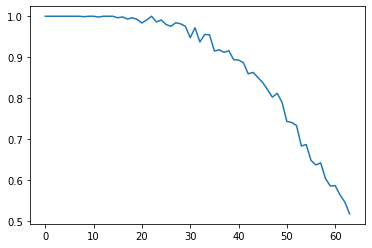

In [12]:
plt.plot(test_accs_i)

In [58]:
print(len(test_losses_i))

64


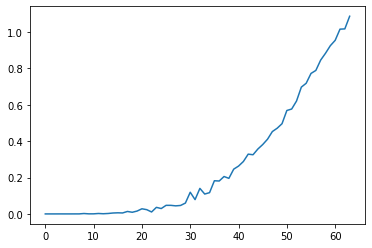

In [73]:
plt.plot(test_losses_i)

In [75]:
with open("data/natural_distribution.np", 'wb') as f:
    np.save(f, test_losses_i[::-1])

In [76]:
with open("data/natural_distribution.np", 'rb') as f:
    test = np.load(f)

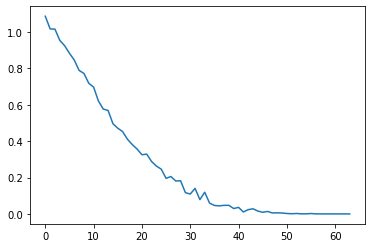

In [77]:
plt.plot(test)

In [ ]:
test_losses_i = []
test_accs_i = []

for i in set(dictionary.keys()):

    x_test_i = x_test[dictionary[i]]
    y_test_i = y_test[dictionary[i]]

    with torch.no_grad():
        y_pred_test_i = model(x_test_i)
        test_loss_i = loss_fn(y_pred_test_i, y_test_i)
        indices = torch.max(y_pred_test_i, 1)[1]
        correct = torch.eq(indices, y_test_i).view(-1)
        test_acc_i = torch.sum(correct)/correct.shape[0]

    test_losses_i.append(test_loss_i.item())
    test_accs_i.append(test_acc_i.cpu())

In [54]:
most_confident_correct_ratio_i = []

for i in set(dictionary.keys()):

    x_test_i = x_test[dictionary[i]]
    y_test_i = y_test[dictionary[i]]
    
    with torch.no_grad():
        y_pred_test_i = model(x_test_i)
        values, indices = torch.max(y_pred_test_i, 1)

        correct = 0

        for i, (value, index) in enumerate(zip(values,indices)):
            pos = np.unravel_index(np.argmax(value.cpu()), (9,9))
            correct += index[pos[0], pos[1]] == y_test_i[i, pos[0], pos[1]]

    most_confident_correct_ratio_i.append((correct/len(values)).cpu()) 

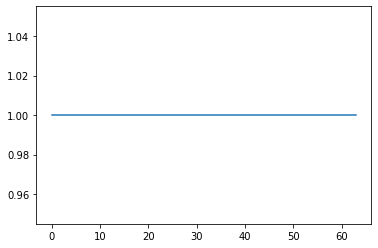

In [55]:
plt.plot(most_confident_correct_ratio_i)

In [42]:
print(np.unravel_index(np.argmax(values[0].cpu(), axis = [1,2]), (9,9)))

TypeError: 'list' object cannot be interpreted as an integer

In [40]:
values.shape

torch.Size([11, 9, 9])